## Graphene AC Nano-Ribbon with vacants.

In [0]:
!pip install kwant
from math import pi, sqrt, tanh
from matplotlib import pyplot as plt
import kwant
import numpy as np

# define two rotated lattices (graphene0 ==> syst0 (w/o vacants))
cos_30, sin_30 = (sqrt(3)/2, 1/2)
pv1, pv2 = (cos_30, sin_30), (0,1)
graphene0 = kwant.lattice.general([pv1, pv2],                             # prim_vecs
                                 [(-1/sqrt(12), -1/2), (1/sqrt(12),1/2)], # base_vecs
                                 norbs=1)
graphene = kwant.lattice.general([pv1, pv2],                              # prim_vecs
                                 [(-1/sqrt(12), -1/2), (1/sqrt(12),1/2)], # base_vecs
                                 norbs=1) 
a0, b0 = graphene0.sublattices
a, b = graphene.sublattices

In [0]:
## defining a lattice w/o vacants for comparison ##
syst0 = kwant.Builder()
def make_system0(l = 20, w = 10, pot = 0.1):
    def nrb(pos):
        (x,y) = pos
        return 0 <= x <= l and 0 <= y <= w
    def potential(site):                        
        (x,y) = site.pos
        return pot    
    syst0[graphene0.shape(nrb, (0, 0))] = potential 
    hoppings = ()
    syst0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    syst0[graphene0.neighbors()] = -1
    sym = kwant.TranslationalSymmetry((-sqrt(3),0))      
    lead = kwant.Builder(sym)
    def lead_shape(pos):
        (x,y) = pos
        return 0 <= y <= w
    lead[graphene0.shape(lead_shape, (0,0))] = pot
    lead[graphene0.neighbors()] = -1
    return syst0, [lead,lead.reversed()]


In [0]:
# defining a lattice w vacants #
syst = kwant.Builder()
def make_system(l = 10, w = 10, pot = 0.1):
    def nrb(pos):
        (x,y) = pos
        return 0 <= x <= l and 0 <= y <= w
# onsite energy
    def potential(site):                        
        (x,y) = site.pos
        return pot    
    syst[graphene.shape(nrb, (0, 0))] = potential 
# hoppings
    hoppings = ()
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    syst[graphene.neighbors()] = -1
# vacants
    # deleting one site in lattice notation a(i,j), b(i,j) for a,b sublattices
    del syst[b(1,1)]
    # by shape
    # def in_hole(site):
    #    x, y = site.pos  
    #    return 2 < x < 3 and 2 < y < 4

    # for site in filter(in_hole, list(syst.sites())):
    #    del syst[site]
# symmetries
    sym = kwant.TranslationalSymmetry((-sqrt(3),0))
# leads
    lead = kwant.Builder(sym)
    def lead_shape(pos):
        (x,y) = pos
        return 0 <= y <= w
    lead[graphene.shape(lead_shape, (0,0))] = pot
    lead[graphene.neighbors()] = -1
    return syst, [lead,lead.reversed()]

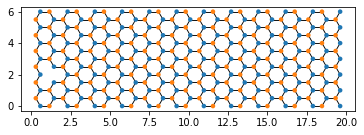

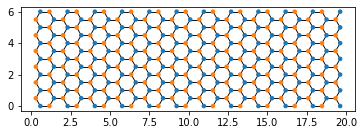

In [10]:
# system generation, checkpoint code
syst0, leads = make_system0(l=20,w = 6, pot = 0.1)
syst, leads = make_system(l=20,w = 6, pot = 0.1)
kwant.plot(syst);
kwant.plot(syst0);


In [0]:
def plot_conductance(syst, energies):
    # transmission as function of energy
    data = []
    data0 = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)    
        data.append(smatrix.transmission(0, 1))
    for energy in energies:
        smatrix0 = kwant.smatrix(syst0, energy)
        data0.append(smatrix0.transmission(0,1))
    plt.figure()
    plt.plot(energies, data, 'b', label = 'w vacants')
    plt.plot(energies, data0, 'k', label = 'w/o vacants')
    plt.xlabel("Energy [t]")
    plt.ylabel("Conductance [2e^2/h]")
    plt.title('Conductance')
    plt.legend()
    plt.show()

# Bandstructure
def plot_bandstructure(flead, momenta):
    bands = kwant.physics.Bands(flead)
    energies = [bands(k) for k in momenta]
    plt.figure()
    plt.plot(momenta, energies)
    plt.xlabel("momenta [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.show()

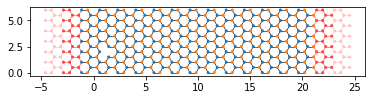

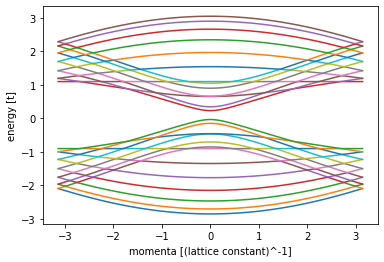

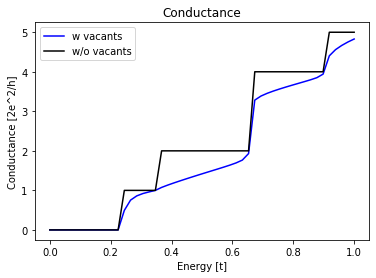

In [12]:
## Representaciones
# Terminamos el sistema y añadimos los leads, preparándolo para los cálculos
for lead in leads:
    syst.attach_lead(lead)
syst = syst.finalized()

for lead in leads:
    syst0.attach_lead(lead)
syst0 = syst0.finalized()
# Plotting the system
kwant.plot(syst);
# kwant.plot(syst0); for ribbon w/o vacants
# Plotting band structure of lead 0 (left)
momenta = [-pi + 0.02 * pi * i for i in range(101)]
plot_bandstructure(syst.leads[0], momenta);
# Plotting conductance
plot_conductance(syst, energies = np.linspace(0, 1))